<a href="https://colab.research.google.com/github/KarthikChapa/Image_detection_using_cnn/blob/main/image_detection_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# <center> #
<br>


<h1><center><b>Deep Learning course project - 1</b></center></h1>
<br>
<br>

<h2><center><b>Title</b> : Small Image Classification Using Convolutional Neural Network (CNN)</center></h2>


<br>
<br>
<br>

<center><img src="https://imgs.search.brave.com/8J72AoW212sNuTo6Py_ETloqGuPe9WuyiPac_XeIxUI/rs:fit:500:0:0/g:ce/aHR0cHM6Ly91cGxv/YWQud2lraW1lZGlh/Lm9yZy93aWtpcGVk/aWEvZW4vdGh1bWIv/ZS9lMy9UaGlzX2lz/X3RoZV9sb2dvX29m/X05JVF9DYWxpY3V0/LnN2Zy81MTJweC1U/aGlzX2lzX3RoZV9s/b2dvX29mX05JVF9D/YWxpY3V0LnN2Zy5w/bmc" width="240" height="250" classname = "image"></center>

<br>
<br>
<br>
<br>
<br>
<br>

<center>
<table  width="650" height="300">
  <tr  style="font-size: 25px;">
    <th width = "150" >Sl.no</th>
    <th width = "300">Name</th>
    <th width = "200">Roll no.</th>
   
  </tr>

  <tr>
    <td>1</td>
    <td>G. Tanmay</td>
    <td>B210753EC</td>
    
  </tr>
  <tr>
    <td>2</td>
    <td>C. Nithin Bhavan</td>
    <td>B210705EC</td>
    
  </tr>
  <tr>
    <td>3</td>
    <td>Ch. Karthik</td>
    <td>B210711EC</td>
   
  </tr>
</table>
  <tr>
    <td>3</td>
    <td>Uday Jinna</td>
    <td>B210674EC</td>
   
  </tr>
</table>
</center>

<br>
<br>



##Convolutional Neural Network


Each convolutional neural network is made up of one or many convolutional layers. These layers are different than the *dense* layers we have seen previously. Their goal is to find patterns from within images that can be used to classify the image or parts of it.

The fundemental difference between a dense layer and a convolutional layer is that dense layers detect patterns globally while convolutional layers detect patterns locally. When we have a densly connected layer each node in that layer sees all the data from the previous layer. This means that this layer is looking at all the information and is only capable of analyzing the data in a global capacity. Our convolutional layer however will not be densly connected, this means it can detect local patterns using part of the input data to that layer.

**Dense Layer:** A dense layer will consider the ENTIRE image. It will look at all the pixels and use that information to generate some output.

**Convolutional Layer:** The convolutional layer will look at specific parts of the image. In this example let's say it analyzes the highlighted parts below and detects patterns there.

###How They Work
A dense neural network learns patterns that are present in one specific area of an image. This means if a pattern that the network knows is present in a different area of the image it will have to learn the pattern again in that new area to be able to detect it.
We'll consider that we have a dense neural network that has learned what an eye looks like from a sample of dog images.

<center><img src="https://drive.google.com/uc?export=view&id=16FJKkVS_lZToQOCOOy6ohUpspWgtoQ-c" alt="alt text" width="500"></center>


Let's say it's determined that an image is likely to be a dog if an eye is present in the boxed off locations of the image above.

Fliping the image.

<center><img src="https://drive.google.com/uc?export=view&id=1V7Dh7BiaOvMq5Pm_jzpQfJTZcpPNmN0W"  width="500"></center>



Since our densly connected network has only recognized patterns globally it will look where it thinks the eyes should be present. Clearly it does not find them there and therefore would likely determine this image is not a dog. Even though the pattern of the eyes is present, it's just in a different location.

Since convolutional layers learn and detect patterns from different areas of the image, they don't have problems with the example we just illustrated. They know what an eye looks like and by analyzing different parts of the image can find where it is present.

##Layer Parameters
A convolutional layer is defined by two key parameters.

####**Filters**
A filter is a m x n pattern of pixels that we are looking for in an image. The number of filters in a convolutional layer reprsents how many patterns each layer is looking for and what the depth of our response map will be. If we are looking for 32 different patterns/filters than our output feature map (aka the response map) will have a depth of 32. Each one of the 32 layers of depth will be a matrix of some size containing values indicating if the filter was present at that location or not.

####**Sample Size**
Each convolutional layer is going to examine n x m blocks of pixels in each image. Typically, we'll consider 3x3 or 5x5 blocks. In the example above we use a 3x3 "sample size". This size will be the same as the size of our filter.

Our layers work by sliding these filters of n x m pixels over every possible position in our image and populating a new feature map/response map indicating whether the filter is present at each location.

##Padding
Padding is simply the addition of the appropriate number of rows and/or columns to your input data such that each pixel can be centered by the filter.
##Strides
The stride size reprsents how many rows/cols we will move the filter each time. These are not used very frequently so we'll move on.
##Pooling
The idea behind a pooling layer is to downsample our feature maps and reduce their dimensions. They work in a similar way to convolutional layers where they extract windows from the feature map and return a response map of the max, min or average values of each channel. Pooling is usually done using windows of size 2x2 and a stride of 2. This will reduce the size of the feature map by a factor of two and return a response map that is 2x smaller.


### Importing Liberaries

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


##Download and prepare the CIFAR10 dataset

The problem we will consider here is classifying 10 different everyday objects. The dataset we will use is built into tensorflow and called the [**CIFAR Image Dataset.**](https://www.cs.toronto.edu/~kriz/cifar.html) It contains 60,000 32x32 color images with 6000 images of each class.

The labels in this dataset are the following:
- Airplane
- Automobile
- Bird
- Cat
- Deer
- Dog
- Frog
- Horse
- Ship
- Truck


##Image Data
This image data is usually made up of 3 dimensions. These 3 dimensions are as follows:
- image height
- image width
- color channels



In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


Normalizing the data

In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
train_images[3].shape

(32, 32, 3)

In [ ]:
#IMG_INDEX = 7

#plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)
#plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
#plt.show()

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

##CNN Architecture
A common architecture for a CNN is a stack of Conv2D and MaxPooling2D layers followed by a few denesly connected layers. To idea is that the stack of convolutional and maxPooling layers extract the features from the image. Then these features are flattened and fed to densly connected layers that determine the class of an image based on the presence of features.

We will start by building the **Convolutional Base**.

### Max pooling
Max pooling is a pooling operation commonly used in convolutional neural networks (CNNs) to downsample feature maps while retaining the most important information

By selecting the maximum value within each region, max pooling reduces the spatial dimensions (width and height) of the input feature map, effectively downsampling it. This downsampling helps in reducing the computational complexity of subsequent layers and improving the model's ability to generalize by capturing the most salient features.

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

##Adding Dense Layers
So far, we have just completed the **convolutional base**. Now we need to take these extracted features and add a way to classify them. This is why we add the following layers to our model.

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

##Training
###Early stoping :
Early stopping is a technique used in machine learning and deep learning to prevent overfitting and improve the generalization ability of the model. It involves monitoring the performance of the model on a validation dataset during training and stopping the training process when the performance starts to degrade.
A stopping criterion is defined based on the performance metric on the validation set. Common criteria include:

* No improvement in performance for a certain number of epochs.
* A decrease in performance after an improvement.
* Performance reaching a plateau.

If the stopping criterion is met, the training process is stopped early. The model parameters at the point where training is stopped are usually saved as the final model.


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    train_images,
    train_labels,
    epochs=8,
    validation_data=(test_images, test_labels),
    callbacks=[early_stopping]
)

#history = model.fit(train_images, train_labels, epochs=8,validation_data=(test_images, test_labels))

Epoch 1/8
1563/1563 [==============================] - 69s 44ms/step - loss: 1.5219 - accuracy: 0.4449 - val_loss: 1.2411 - val_accuracy: 0.5541
Epoch 2/8
1563/1563 [==============================] - 71s 46ms/step - loss: 1.1639 - accuracy: 0.5863 - val_loss: 1.0958 - val_accuracy: 0.6147
Epoch 3/8
1563/1563 [==============================] - 83s 53ms/step - loss: 1.0252 - accuracy: 0.6396 - val_loss: 0.9957 - val_accuracy: 0.6503
Epoch 4/8
1563/1563 [==============================] - 78s 50ms/step - loss: 0.9321 - accuracy: 0.6733 - val_loss: 0.9230 - val_accuracy: 0.6807
Epoch 5/8
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8644 - accuracy: 0.6967 - val_loss: 0.9333 - val_accuracy: 0.6758
Epoch 6/8
1563/1563 [==============================] - 65s 41ms/step - loss: 0.8118 - accuracy: 0.7142 - val_loss: 0.9267 - val_accuracy: 0.6786
Epoch 7/8
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7624 - accuracy: 0.7326 - val_loss: 0.8875 - val_ac

##Evaluate the model

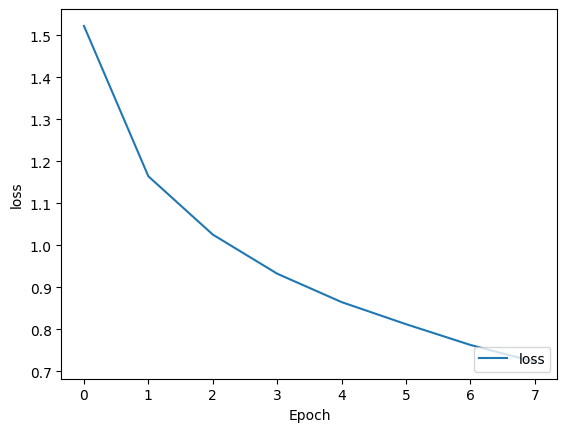

In [ ]:
plt.plot(history.history['loss'], label='loss')
#plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('loss')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')


In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print("Percentage Accuracy = ", test_acc *100)

313/313 - 3s - loss: 0.9166 - accuracy: 0.6839 - 3s/epoch - 10ms/step
Percentage Accuracy =  68.3899998664856


In [ ]:
import numpy as np

y_pred = model.predict(test_images)
y_pred[:5]


313/313 [==============================] - 4s 11ms/step


array([[-0.85925984, -3.1014767 , -1.4439322 ,  2.183645  , -4.134256  ,
         1.1273814 , -0.92459613, -2.5216973 ,  1.4425155 , -1.6276826 ],
       [ 1.6857969 ,  4.703753  , -2.7254605 , -4.2616186 , -4.891041  ,
        -7.1155148 , -5.8241935 , -7.4368224 ,  6.7644215 ,  0.77115035],
       [ 2.2393105 , -0.81058556, -1.880709  , -2.6158102 , -1.5485078 ,
        -4.514847  , -3.2456963 , -3.9272933 ,  3.45765   ,  0.39327896],
       [ 4.6778793 , -2.471478  ,  0.8160303 , -1.473414  , -1.1227235 ,
        -4.231683  , -4.088     , -3.3769236 ,  1.5878755 , -4.207876  ],
       [-3.3583033 , -5.119612  ,  0.90523475,  0.57445127,  4.6426544 ,
        -0.498266  ,  2.512182  , -5.0805383 , -4.098059  , -6.5134354 ]],
      dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
tc=y_classes[:5]
y_classes[:5]


[3, 8, 8, 0, 4]

In [ ]:
for i in range(5):
  print (class_names[tc[i]])

cat
ship
ship
airplane
deer


In [ ]:
plt.figure(figsize=(5,5))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    plt.xlabel(class_names[test_labels[i][0]])
plt.show()

**DATA** **AUGMENTATION**

To avoid overfitting and create a larger dataset from a smaller one we can use a technique called data augmentation. This is simply performing random transofrmations on our images so that our model can generalize better. These transformations can be things like compressions, rotations, stretches and even color changes.

Keras can help us do this. Look at the code below to an example of data augmentation.

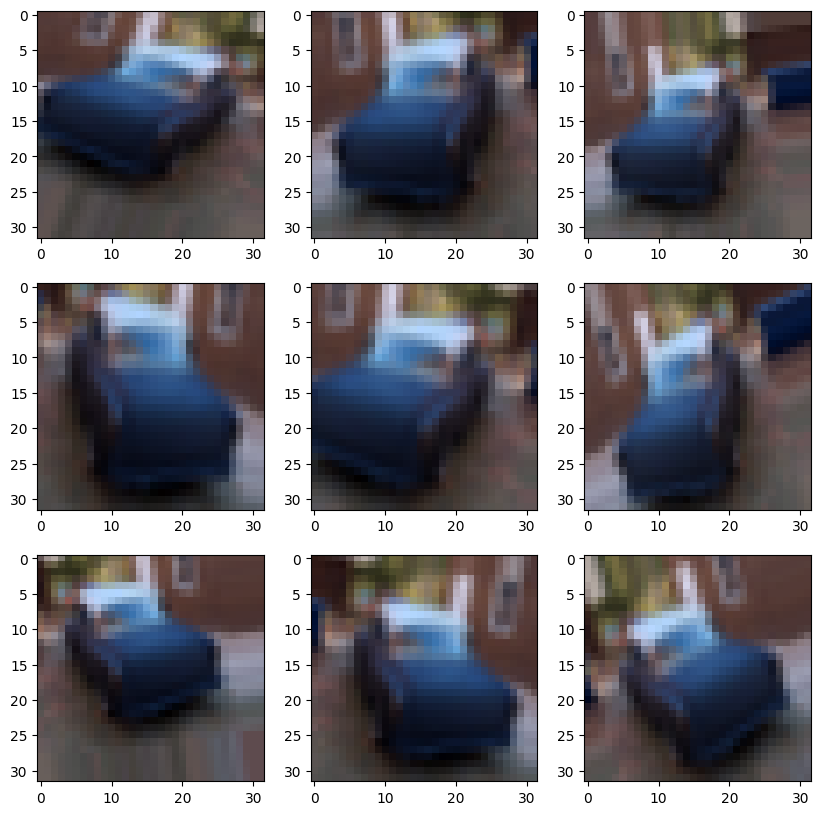

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img


test_img = train_images[690]


datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


img = img_to_array(test_img)
img = np.expand_dims(img, axis=0)


augmented_images = datagen.flow(img, batch_size=1)


plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_image = augmented_images.next()[0]
    plt.subplot(3, 3, i + 1)
    plt.imshow(array_to_img(augmented_image))
plt.show()


In [ ]:
img.shape

(1, 32, 32, 3)

##Conclusion


*   Successfully built a convolutional neural network (CNN) for classifying small images from the CIFAR-10 dataset.
*   The model achieved an accuracy of 70% on the training set and 68% on the test set.
*   Different CNN architectures, advanced training techniques (e.g., learning rate scheduling, regularization), and ensemble methods to potentially improve accuracy
*   Gained insights can be applied to other image recognition tasks and deep learning projects.






# References


*   Dataset : https://www.cs.toronto.edu/~kriz/cifar.html
*   CNN model refernce : https://www.tensorflow.org/tutorials/images/cnn
*   Some other references : https://www.youtube.com/watch?v=tPYj3fFJGjk&pp=ygUaZnJlZSBjb2RlIGNhbXAgdGVub3NyIGZsb3c%3D
*   github repo link : https://github.com/KarthikChapa/DeepLearningCourseProjects.git

